In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
def get_files(run, base_dir, grid_dir, grid_type):
    
    fname = glob.glob(os.path.join(bas_dir, run,'*{}.nc'.format(grid_type)))[0]
    f = nc.Dataset(fname)
    
    mesh_mask = nc.Dataset(os.path.join(grid_dir,'mesh_mask.nc'))
    
    return f, mesh_mask

In [3]:
runs = ['base_aug', 'base_aug_noHoll', 'base_aug_enst']
bas_dir = '/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/mixing_paper/'
grid_dir = '/data/nsoontie/MEOPAR/2Ddomain/grid/'

In [4]:
fUs = {}
fWs = {}
fVs={}
meshs = {}

for run in runs:
    fUs[run], meshs[run] = get_files(run, bas_dir, grid_dir, 'grid_U')
    fWs[run], meshs[run] = get_files(run, bas_dir, grid_dir, 'grid_W')
    fVs[run], meshs[run] = get_files(run, bas_dir, grid_dir, 'grid_V')

In [5]:
def calculate_average_KE(u, v, mesh_mask,):
    tmask = mesh_mask.variables['tmask'][...,1:,1:]
    e3t = mesh_mask.variables['e3t_0'][...,1:,1:]
    e1t = mesh_mask.variables['e1t'][...,1:,1:]
    e2t = mesh_mask.variables['e2t'][...,1:,1:]
    print(e2t.shape,tmask.shape)
    
    umask = mesh_mask.variables['umask'][:] + np.zeros(u.shape)
    vmask = mesh_mask.variables['vmask'][:] + np.zeros(v.shape)
    
    um = np.ma.array(u,mask=1-umask)
    vm = np.ma.array(v,mask=1-vmask)
    
    us, vs = viz_tools.unstagger(um,vm)
    
    KE = us**2 + vs**2
    volume = np.sum(tmask*e3t*e2t*e1t)
    print(run, volume)
    KE_vol = KE*e3t*e2t*e1t*tmask
    KEavg =np.sum(np.sum(np.sum(KE_vol, axis=-1),axis=-1),axis=-1)/volume
    
    return KEavg

In [6]:
KE_avgs = {}
KEs = {}

for run in runs:
    v = fVs[run].variables['vomecrty'][:]
    u = fUs[run].variables['vozocrtx'][:]
    KE_avgs[run] = calculate_average_KE(u,v, meshs[run])

(1, 9, 1099) (1, 40, 9, 1099)
base_aug 396128361845.0
(1, 9, 1099) (1, 40, 9, 1099)
base_aug_noHoll 396128361845.0
(1, 9, 1099) (1, 40, 9, 1099)
base_aug_enst 396128361845.0


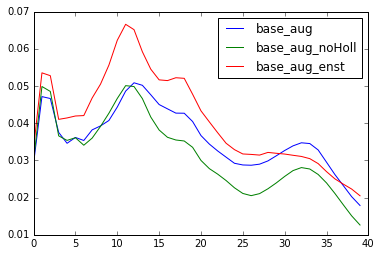

In [7]:
for run in runs:
    plt.plot(KE_avgs[run][:] ,label=run)
plt.legend(loc=0)

In [ ]:
plt.plot(KE_avgs[runs[0]] - KE_avgs[runs[1]])

In [ ]:
t=39
fig,axs = plt.subplots(1,2,figsize=(15,5))
for run, ax in zip(runs,axs):
    w = fWs[run].variables['vovecrtz'][:]
    u = fUs[run].variables['vozocrtx'][:]
    depts = meshs[run]['gdepu'][0,:,5,:]
    phi = meshs[run]['glamu'][0,5,:]
    mesh=ax.pcolormesh(phi, depts,u[t,:,5,:],vmin=-.5,vmax=.5,label=run)
    plt.colorbar(mesh,ax=ax)
    ax.set_title(run)

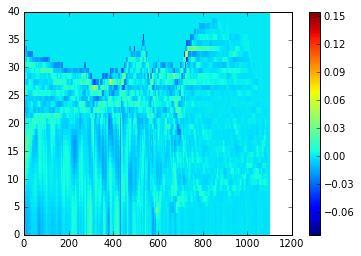

In [70]:
plt.pcolormesh(v[-1,:,6,:])
plt.colorbar()

In [66]:
print(run)

base_aug_noHoll


In [39]:
meshs[run].variables

OrderedDict([('nav_lon', <class 'netCDF4._netCDF4.Variable'>
              float32 nav_lon(y, x)
              unlimited dimensions: 
              current shape = (10, 1100)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('nav_lat', <class 'netCDF4._netCDF4.Variable'>
              float32 nav_lat(y, x)
              unlimited dimensions: 
              current shape = (10, 1100)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('nav_lev', <class 'netCDF4._netCDF4.Variable'>
              float32 nav_lev(z)
              unlimited dimensions: 
              current shape = (40,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time_counter', <class 'netCDF4._netCDF4.Variable'>
              float64 time_counter(t)
              unlimited dimensions: t
              current shape = (1,)
              filling on, default _FillValue of 9.969209968386869e+36 used)